<a href="https://colab.research.google.com/github/mounirouadi/Deep-learning-for-computer-vision-workshop-V2.0/blob/main/linear_regression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [4]:
%matplotlib inline
#imports
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [5]:
!gdown --id 1bWpaXAsmqfJZXwRHdfUIzB9kHPqqgMWJ

Downloading...
From: https://drive.google.com/uc?id=1bWpaXAsmqfJZXwRHdfUIzB9kHPqqgMWJ
To: /content/data.csv
100% 3.78k/3.78k [00:00<00:00, 4.84MB/s]


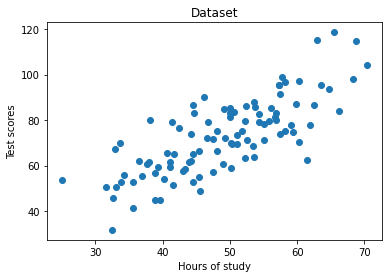

In [6]:
points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [7]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_w = 0
num_iterations = 10

#### Define cost function

In [8]:
def compute_cost(b, w, points):
    total_cost = 0
    n = len(points)
    
    #Compute sum of squared errors
    for i in range(0, n):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (w * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/n

#### Define Gradient Descent functions

In [9]:
def step_gradient(b_current, w_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0
    n = len(points)

    #Calculate Gradient
    for i in range(0, n):
        x = points[i, 0]
        y = points[i, 1]
        w_gradient +=  (2/n) * x * (y - (w_current * x + b_current))
        b_gradient +=  (2/n) * (y - (w_current * x + b_current))
    
    #Update current m and b
    w_updated = w_current + learning_rate * w_gradient
    b_updated = b_current + learning_rate * b_gradient

    #Return updated parameters
    return b_updated, w_updated

################################################################################################################################

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    cost_graph = []

    #For every iteration, optimize b, w and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, w, points))
        b, w = step_gradient(b, w, array(points), learning_rate)

    return [b, w, cost_graph]

#### Run gradient_descent_runner() to get optimized parameters b and m

In [10]:
b, w, cost_graph = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, w, points))

Optimized b: 0.02963934787473239
Optimized w: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

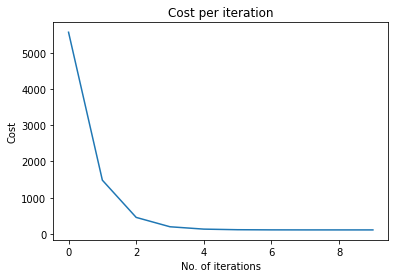

In [11]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

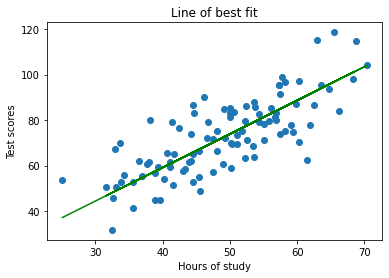

In [12]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = w * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c = 'g')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()